In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
import keras.losses
from keras.datasets import fashion_mnist
import os
import numpy as np

C:\Users\KNatarajan\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [3]:
print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)
Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_X[1512], cmap = 'gray')
plt.title('Classes: {}'.format(train_Y[0]))
plt.show()

In [5]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [6]:
#convert into float and normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [7]:
train_Y_one_hot = keras.utils.to_categorical(train_Y)
test_Y_one_hot = keras.utils.to_categorical(test_Y)

In [8]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

In [15]:
batch_size = 64
epochs = 10
num_classes = 10

In [17]:
fashion_model = Sequential()
fashion_model.add(Conv2D(8, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(16, kernel_size = (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dense(num_classes, activation = 'softmax'))
fashion_model.summary()
fashion_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 16)          0         
__________

In [18]:
#Test the model
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)
print('Test loass:', test_eval[0])
print('Test accuracy: ', test_eval[1])

10000/10000 [==============================] - 5s 523us/step
Test loass: 0.28031500532627107
Test accuracy:  0.8985


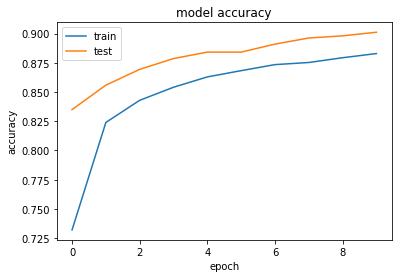

In [19]:
plt.plot(fashion_train.history['acc'])
plt.plot(fashion_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

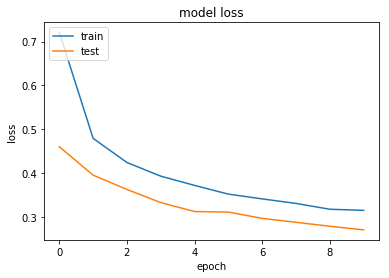

In [20]:
plt.plot(fashion_train.history['loss'])
plt.plot(fashion_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [21]:
model_json = fashion_model.to_json()
#save the CNN architecture0
with open('fashion_model_dropout.json','w') as json_file:
    json_file.write(model_json)

#Serialize the weights to HDF5
fashion_model.save_weights('model_dropout.h5')
print("Successfully saved..")

Successfully saved..


In [ ]:
from keras.utils.vis_utils import plot_model
handler = open("fashion_model_dropout.json","r")
json_str = handler.read()
model = keras.models.model_from_json(json_str)
print("Loaded the model successfully")

model.load_weights("model_dropout.h5")
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
plot_model(model, "tmp_model.png")